In [1]:
from sim_core.engine import Engine
from sim_core.car import Car
from sim_core.autoTransmission import AutoTransmission
from sim_core.utils import ms_to_kph, example_torque_curve
from sim_core.tire import Tire
from sim_core.compound import hard_compound, medium_compound, soft_compound

engine = Engine(
    ratio_gears=[3.5, 2.8, 2.1, 1.7, 1.3, 1],
    ratio_differential=4,
    torque_output = example_torque_curve,
    max_rpm=10000,
    min_rpm=500,
    idle_rpm=2000
)

car = Car(
    mass=700,
    radius_wheel=0.3,
    engine=engine
)

auto_transmission = AutoTransmission(
    car.engine,
    8000,
    3000
)

soft_tire = Tire(soft_compound)
medium_tire = Tire(medium_compound)
hard_tire = Tire(hard_compound)

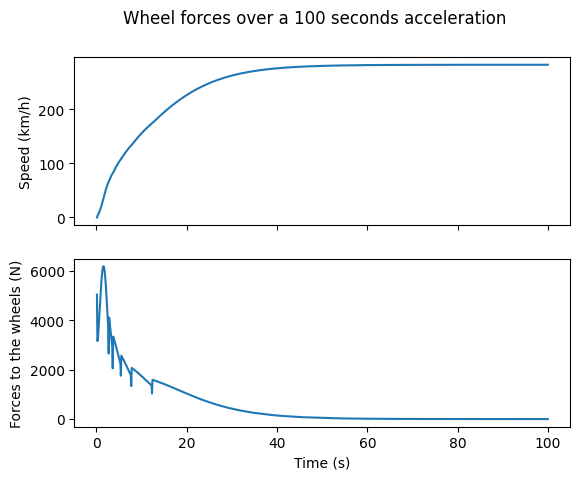

In [2]:
import matplotlib.pyplot as plt
import numpy as np

car.reset()

ten_seconds = (np.arange(1000) + 1) / 10 # Time step every 0.1s up to 100 seconds

wheel_forces_values_1 = []
speed_values_1 = []

for i in ten_seconds:
    speed_values_1 = np.append(speed_values_1, ms_to_kph(car.speed))
    wheel_forces_values_1 = np.append(wheel_forces_values_1, car.force_wheel())
    car.accelerate(0.1) # Move the time 0.1s forward
    auto_transmission.update()

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

fig.suptitle('Wheel forces over a 100 seconds acceleration')

ax1.plot(ten_seconds, speed_values_1)
ax1.set_ylabel('Speed (km/h)')
ax2.plot(ten_seconds, wheel_forces_values_1)
ax2.set_ylabel('Forces to the wheels (N)')
ax2.set_xlabel('Time (s)')
fig.savefig('fig/wheel_forces.svg', format='svg')

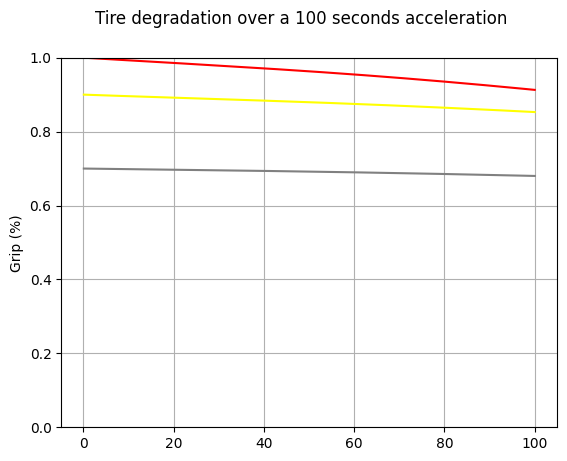

In [5]:
soft_tire.reset()
medium_tire.reset()
hard_tire.reset()

soft_grip = []
medium_grip = []
hard_grip = []

for i, s in enumerate(ten_seconds):
    soft_grip.append(soft_tire.get_grip())
    medium_grip.append(medium_tire.get_grip())
    hard_grip.append(hard_tire.get_grip())
    
    soft_tire.update(wheel_forces_values_1[i], 0, 9.81 * 700, 90, 0.8)
    medium_tire.update(wheel_forces_values_1[i], 0, 9.81 * 700, 90, 0.8)
    hard_tire.update(wheel_forces_values_1[i], 0, 9.81 * 700, 90, 0.8)


fig, ax1 = plt.subplots()

fig.suptitle('Tire degradation over a 100 seconds acceleration')

ax1.plot(ten_seconds, soft_grip, color='red')
ax1.plot(ten_seconds, medium_grip, color='yellow')
ax1.plot(ten_seconds, hard_grip, color='gray')
ax1.set_ylim([0, 1])
ax1.set_ylabel('Grip (%)')
ax1.set_xlabel('Time (s)')
ax1.grid()
fig.savefig('fig/wheel_stress.svg', format='svg')

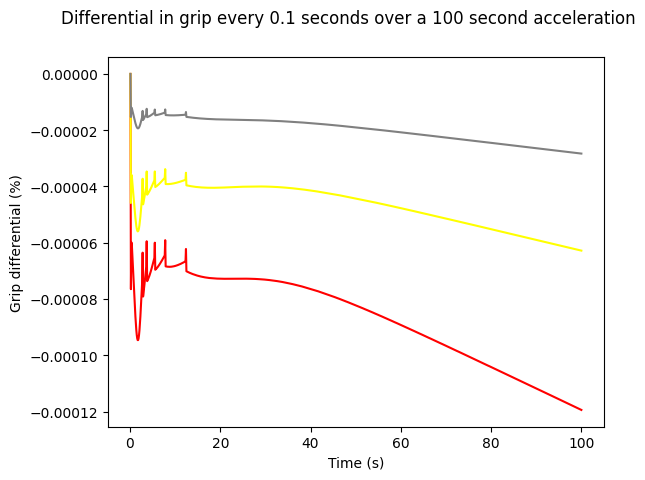

In [6]:
soft_tire.reset()
medium_tire.reset()
hard_tire.reset()

soft_grip = []
medium_grip = []
hard_grip = []
stress_evolution = []

soft_prev = soft_tire.get_grip()
medium_prev = medium_tire.get_grip()
hard_prev = hard_tire.get_grip()

for i, s in enumerate(ten_seconds):
    
    soft_grip.append(soft_tire.get_grip() - soft_prev)
    medium_grip.append(medium_tire.get_grip() - medium_prev)
    hard_grip.append(hard_tire.get_grip() - hard_prev)
    
    soft_prev = soft_tire.get_grip()
    medium_prev = medium_tire.get_grip()
    hard_prev = hard_tire.get_grip()

    soft_tire.update(wheel_forces_values_1[i], 0, 9.81 * 700, 90, 0.8)
    medium_tire.update(wheel_forces_values_1[i], 0, 9.81 * 700, 90, 0.8)
    hard_tire.update(wheel_forces_values_1[i], 0, 9.81 * 700, 90, 0.8)
    


fig, ax1 = plt.subplots()

fig.suptitle('Differential in grip every 0.1 seconds over a 100 second acceleration')

ax1.plot(ten_seconds, soft_grip, color='red')
ax1.plot(ten_seconds, medium_grip, color='yellow')
ax1.plot(ten_seconds, hard_grip, color='gray')

ax1.set_ylabel('Grip differential (%)')
ax1.set_xlabel('Time (s)')
fig.savefig('fig/wheel_stress_dif.svg', format='svg')